In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Preparation 

In [3]:
df = pd.read_csv('Churn_Modelling.csv.xls')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Knowing Intial Details

In [7]:
df.shape

(10000, 14)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [11]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [13]:
df.duplicated().sum()

0

# Analysis OF Data 

In [16]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [18]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [20]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [22]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [24]:
df.corr( numeric_only = True)

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


<Axes: >

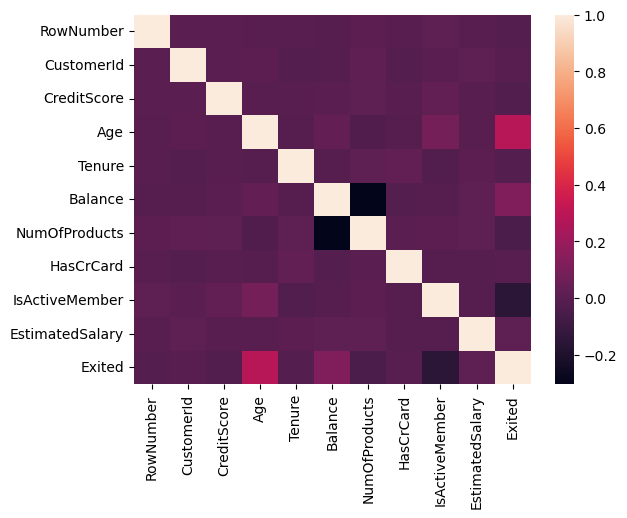

In [26]:
import seaborn as sns
sns.heatmap(df.corr( numeric_only = True))

# Data Cleaning | Drop Unnecessary Culumns |

In [5]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [31]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Perform Complete EDA on Necessary Columns with Visulisation

<Axes: title={'center': ' Compare to Churn AND Not Churn Customers '}, ylabel='count'>

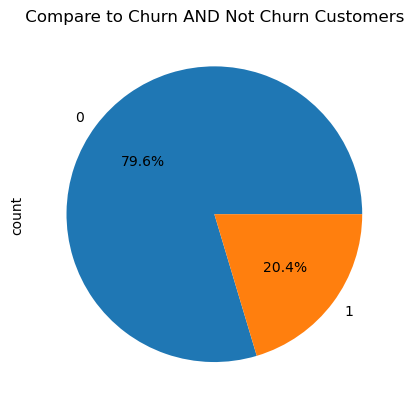

In [34]:
df['Exited'].value_counts().plot(kind = 'pie',
                                   autopct="%1.1f%%",
                                   title = ' Compare to Churn AND Not Churn Customers ')

# summary -: " The Total 20% customer from belong to Churn | under the 80% Customer Belong to The Not Churn Customers  

<Axes: title={'center': ' Number Of Churn Customers =  1 and Number Of Not Churn Customers = 0 '}, xlabel='Churn AND Not Churn Customers', ylabel='Number of Customers'>

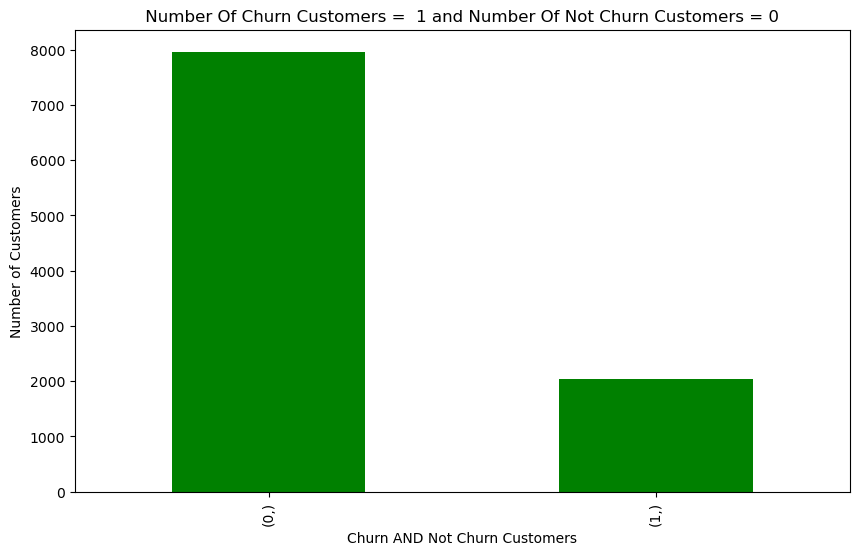

In [37]:
df[['Exited']].value_counts().plot(kind = 'bar',
                                              title = " Number Of Churn Customers =  1 and Number Of Not Churn Customers = 0 ",
                                              ylabel = "Number of Customers",
                                              xlabel = 'Churn AND Not Churn Customers',
                                              figsize = (10,6),
                                              color = 'Green')

# Summary -: " Total Churn Customer is 2000 in Out OF 10000 Thousand"

<Axes: title={'center': 'Gender Wise Churn AND Not Churn Customer'}, ylabel='count'>

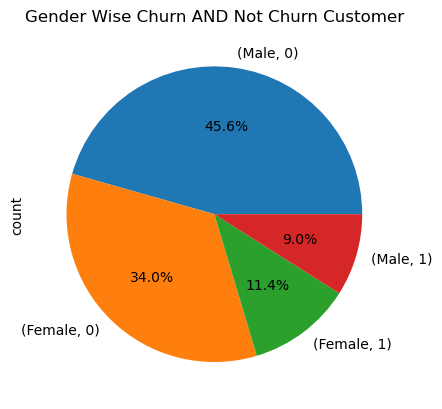

In [40]:
df[['Gender','Exited']].value_counts().plot(kind = 'pie',
                                autopct = '%1.1f%%',
                                title = 'Gender Wise Churn AND Not Churn Customer')

# Summary -: 'Male Customers Are Highly Not Churn Customers Compare to Female Customers | Female is Highly Churn Comapre to Male Customers '

<Axes: title={'center': 'How Many Gender Customers Are Exist and How Many Gender Customers are Not Exist'}, xlabel='Exited and Not Exited Customers  Behalf Of Gender', ylabel='Number of Customers'>

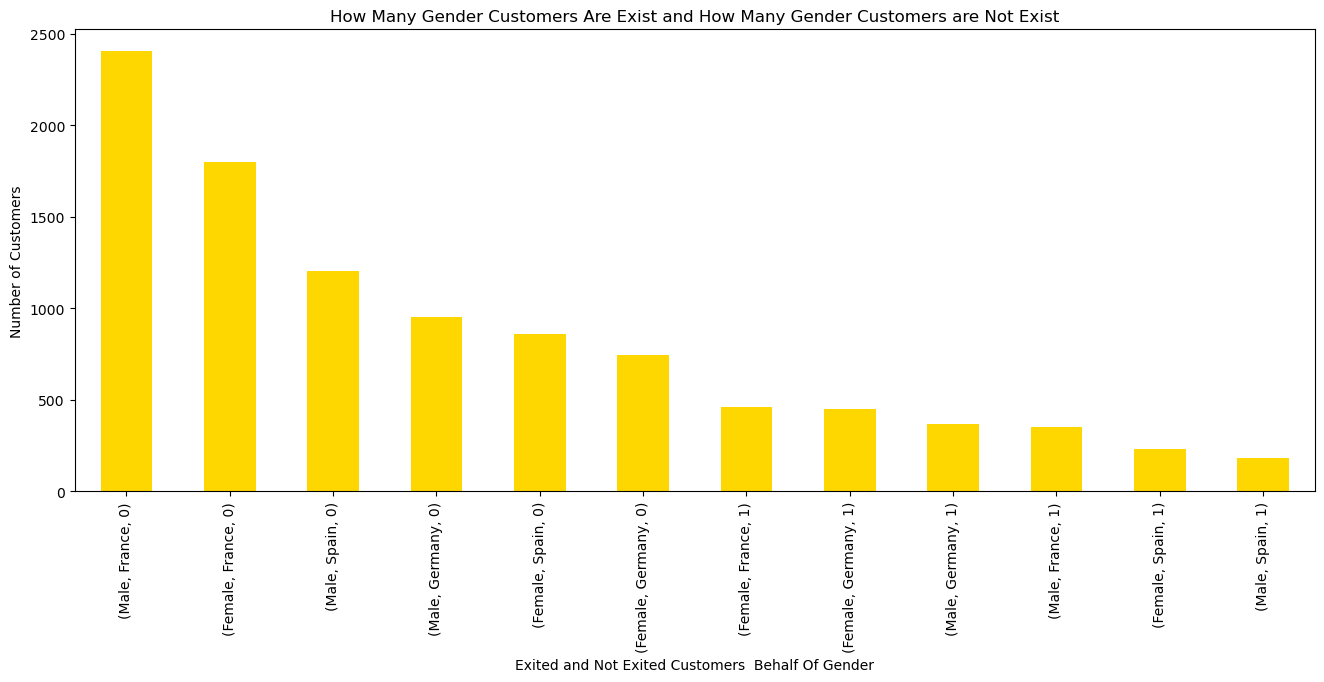

In [43]:
df[['Gender','Geography','Exited']].value_counts().plot(kind = 'bar',
                                              title = "How Many Gender Customers Are Exist and How Many Gender Customers are Not Exist",
                                              ylabel = "Number of Customers",
                                              xlabel = 'Exited and Not Exited Customers  Behalf Of Gender',
                                              figsize = (16,6),
                                              color = 'gold')

# Summary -: 1."In this senario Female Customers From the France & Germany  Taking Exited to the bank in Big Number Of Amount"
# 2. "The Male Customers from the France & Germany Taking the Exited to the Bank  But The Less Number of Female Customers "
# 3. "From Spain The Females are High Number OF Amount Exited to the Bank comapre to the Male Customers"

# Dedecting Outliers in data set and Remove to data 

In [47]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


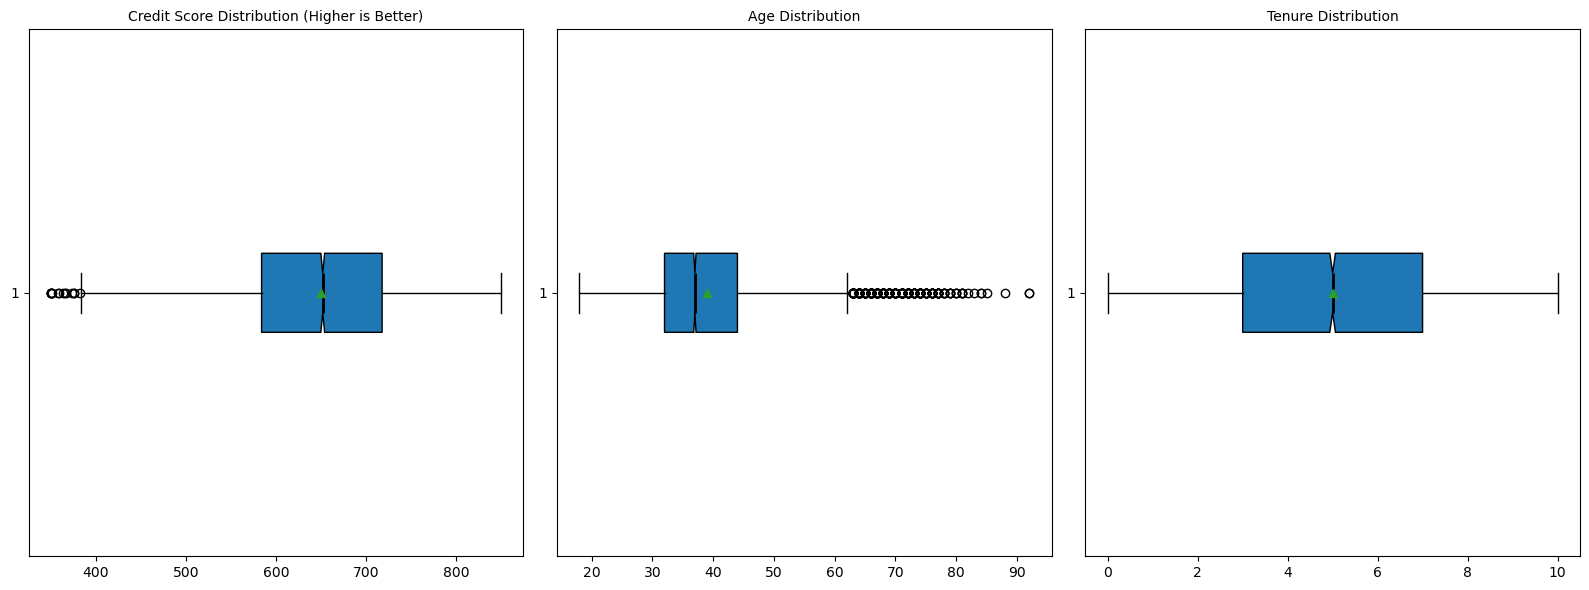

In [49]:
fig, axes = plt.subplots(1,3, figsize=(16, 6)) 

axes[0].boxplot(df['CreditScore'], vert=False, showmeans=True, patch_artist=True,
               notch=True, medianprops={"linewidth": 2, "color": "black"})
axes[0].set_title('Credit Score Distribution (Higher is Better)', fontsize=10)

axes[1].boxplot(df['Age'], vert=False, showmeans=True, patch_artist=True,
               notch=True, medianprops={"linewidth": 2, "color": "black"})
axes[1].set_title('Age Distribution', fontsize=10)

axes[2].boxplot(df['Tenure'], vert=False, showmeans=True, patch_artist=True,
               notch=True, medianprops={"linewidth": 2, "color": "black"})
axes[2].set_title('Tenure Distribution', fontsize=10)

plt.tight_layout()
plt.show()

# 1. In Credit Score Detecting Outliers which Value Is Less Then 400 Hundread 
# 2. In Age Distribution Detecting Outliers Which Age Greter Then 85 

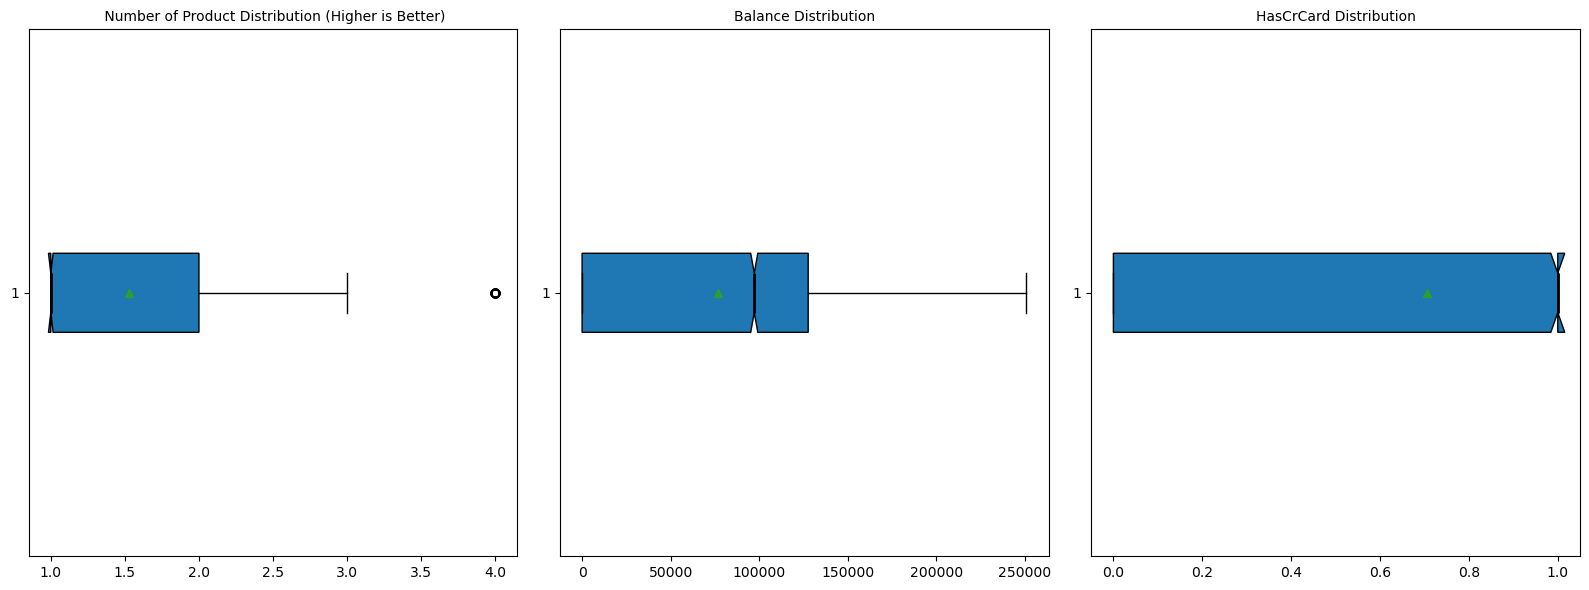

In [52]:
fig, axes = plt.subplots(1,3, figsize=(16, 6)) 

axes[0].boxplot(df['NumOfProducts'], vert=False, showmeans=True, patch_artist=True,
               notch=True, medianprops={"linewidth": 2, "color": "black"})
axes[0].set_title(' Number of Product Distribution (Higher is Better)', fontsize=10)

axes[1].boxplot(df['Balance'], vert=False, showmeans=True, patch_artist=True,
               notch=True, medianprops={"linewidth": 2, "color": "black"})
axes[1].set_title('Balance Distribution', fontsize=10)

axes[2].boxplot(df['HasCrCard'], vert=False, showmeans=True, patch_artist=True,
               notch=True, medianprops={"linewidth": 2, "color": "black"})
axes[2].set_title('HasCrCard Distribution', fontsize=10)

plt.tight_layout()
plt.show()

# 1. In Number Of Product Detecting Outliers Which Are Greter Then 4 Value

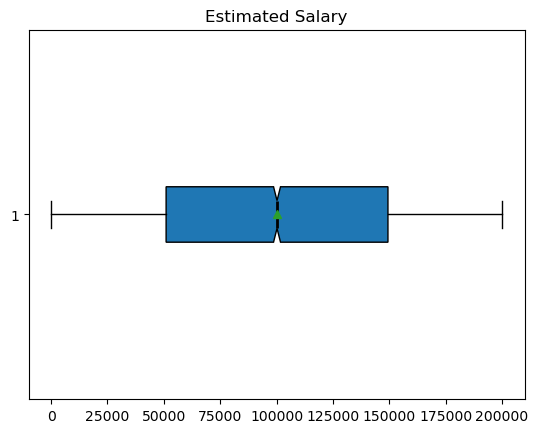

In [55]:
plt.boxplot(df['EstimatedSalary'], vert=False, showmeans=True, patch_artist=True,
               notch=True, medianprops={"linewidth": 2, "color": "black"})
plt.title('Estimated Salary')
plt.show()

# Final Summary -: Only Age Columns Outliers Present Age Of Greter Then 85
# Final Summary -: Only Credit Score Outliers Present Credit Score Less Then 400

In [7]:
df = df.drop(index=df[df['CreditScore'] < 400].index)

In [62]:
df.shape

(9981, 11)

In [9]:
df = df.drop(index= df[df['Age'] > 85].index)

In [66]:
df.shape

(9978, 11)

# Converting Categorical Data TO Numerical Data 

In [11]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le = LabelEncoder()

In [15]:
df['Geography'] = le.fit_transform(df['Geography'])
df['Gender'] = le.fit_transform(df['Gender'])

In [75]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


# Using Train AND Test AND Split | Model Selection In Machine Learning 

In [17]:
from sklearn.model_selection import train_test_split

In [19]:
x = df.iloc[:,0:10]
print(x.head())
y = df.iloc[:,-1]
print(y.head())

   CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619          0       0   42       2       0.00              1   
1          608          2       0   41       1   83807.86              1   
2          502          0       0   42       8  159660.80              3   
3          699          0       0   39       1       0.00              2   
4          850          2       0   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  
0          1               1        101348.88  
1          0               1        112542.58  
2          1               0        113931.57  
3          0               0         93826.63  
4          1               1         79084.10  
0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64


In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [86]:
print(len(x_train))
print()
print(len(x_test))
print()
print(len(y_train))
print()
print(len(y_test))

7982

1996

7982

1996


# Scaling Our Data for Better Performance in Machine Learning Model

In [23]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()

In [27]:
x_train_scaler = scaler.fit_transform(x_train)
x_test_scaler = scaler.fit_transform(x_test)

In [95]:
x_train_scaler

array([[ 1.00597194, -0.89286335,  0.91006486, ..., -1.56126674,
        -1.0253783 , -0.68733851],
       [ 0.52687915,  1.53246769,  0.91006486, ...,  0.64050554,
         0.97524981,  0.78863213],
       [-0.31674076, -0.89286335,  0.91006486, ...,  0.64050554,
         0.97524981, -0.01609239],
       ...,
       [ 0.34982312, -0.89286335,  0.91006486, ...,  0.64050554,
         0.97524981, -0.97317103],
       [ 1.05804724,  0.31980217,  0.91006486, ...,  0.64050554,
         0.97524981, -0.73104322],
       [ 0.63102976, -0.89286335, -1.09882278, ...,  0.64050554,
         0.97524981,  0.76847777]])

In [97]:
x_test_scaler

array([[ 2.09446929,  1.45323893,  0.92094959, ...,  0.67046846,
         0.94823187, -1.53860627],
       [-0.28943367,  1.45323893,  0.92094959, ...,  0.67046846,
         0.94823187,  0.08582373],
       [-1.89961374, -0.93610613,  0.92094959, ...,  0.67046846,
        -1.05459438, -1.26317212],
       ...,
       [ 2.01082358,  1.45323893,  0.92094959, ..., -1.49149446,
        -1.05459438, -1.45403519],
       [-0.73902941, -0.93610613,  0.92094959, ...,  0.67046846,
        -1.05459438, -1.67921451],
       [-0.10123081, -0.93610613, -1.08583576, ...,  0.67046846,
        -1.05459438, -0.90245855]])

# Apply Deep Learning Model | Artificial Neural Network | ANN

In [29]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [31]:
model = Sequential()

In [33]:
input_layers = Dense(20,input_shape=(10,))

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
model.add(input_layers)

In [37]:
hidden_layers_1 = Dense(20,activation='relu')

In [39]:
model.add(hidden_layers_1)

In [41]:
#hidden_layers_2 = Dense(20,activation='relu')
#model.add(hidden_layers_2)
output_layers = Dense(1,activation='sigmoid')
model.add(output_layers)

In [43]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 20)             │           220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 661 (2.58 KB)

 Trainable params: 661 (2.58 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
model.compile(loss='binary_crossentropy',optimizer='Adam',
             metrics=['accuracy'])

In [47]:
from tensorflow.keras.callbacks import EarlyStopping


In [49]:
collback = EarlyStopping( monitor='val_loss',
    min_delta=0.00001,
    patience=10,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=False,)

In [51]:
history = model.fit(x_train_scaler,y_train,epochs=200,validation_data=(x_test_scaler,y_test),batch_size = 20,callbacks=collback)

Epoch 1/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7657 - loss: 0.5073 - val_accuracy: 0.8231 - val_loss: 0.4111
Epoch 2/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8301 - loss: 0.4033 - val_accuracy: 0.8342 - val_loss: 0.3898
Epoch 3/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8446 - loss: 0.3884 - val_accuracy: 0.8502 - val_loss: 0.3648
Epoch 4/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8529 - loss: 0.3643 - val_accuracy: 0.8502 - val_loss: 0.3597
Epoch 5/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8628 - loss: 0.3427 - val_accuracy: 0.8532 - val_loss: 0.3502
Epoch 6/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8596 - loss: 0.3548 - val_accuracy: 0.8542 - val_loss: 0.3510
Epoch 7/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8652 - loss: 0.3338 - val_accuracy: 0.8542 - val_loss: 0.3501
Epoch 8/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8628 - loss: 0.3435 - val_accu

# Model Evaluation 

In [53]:
val_loss,val_acc = model.evaluate(x_test_scaler,y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step - accuracy: 0.8435 - loss: 0.3668


In [55]:
y_pred = model.predict(x_test_scaler)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [57]:
y_log = np.where(y_pred >= 0.5,1,0)

# Cheaking Accuracy Our Model

In [60]:
from sklearn.metrics import accuracy_score

In [62]:
acc_of_mpdel  = accuracy_score(y_log,y_test)

In [64]:
acc_of_mpdel

0.8527054108216433

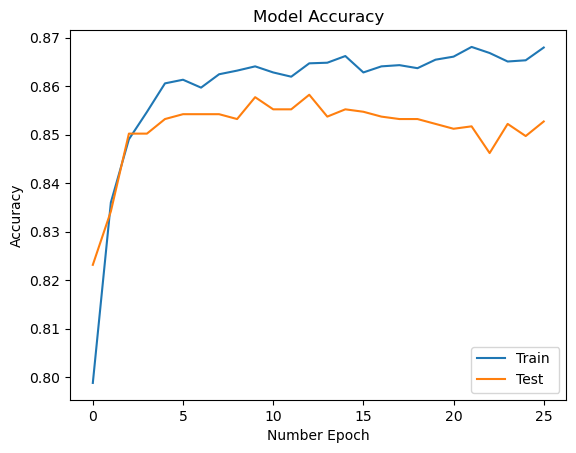

In [66]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Number Epoch')
plt.legend(['Train ', 'Test'],loc = 'lower right')
plt.show()

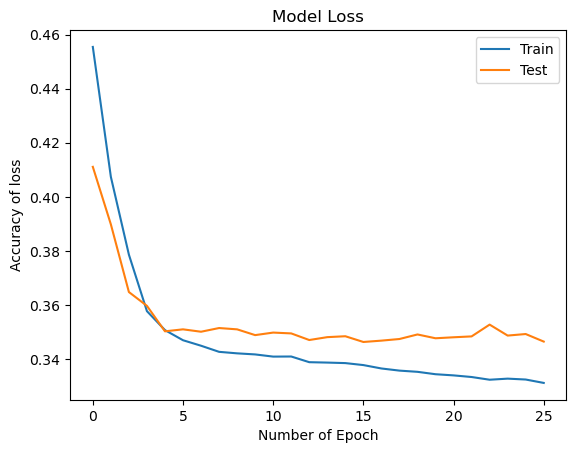

In [68]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Number of Epoch')
plt.ylabel('Accuracy of loss')
plt.legend(['Train','Test'],loc = 'upper right')
plt.show()


# Make Prediction On New DATA SET 

In [70]:
lst = ([[756,1,1,32,5,156792.89,1,0,1,105000.78]])

In [72]:
p = scaler.transform(lst)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [74]:
s = model.predict(p)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [76]:
if s >= 0.5:
    print('1')
else:
    print('0')

0
